## Module 01: Practical Stats

### Lesson 14: Regression

> Use python to fit linear regression models, as well as understand how to interpret the results of linear models.

#### 01. Video: Introduction

In this lesson, you will:

1. Identify **Regression(回归)** Applications
2. Learn How Regression Works
3. Apply Regression to Problems Using Python

#### 02. Video: Introduction to Machine Learning

Machine Learning is frequently split into **supervised and unsupervised learning**. Regression, which you will be learning about in this lesson (and its extensions in later lessons), is an example of **supervised machine learning**.

In **supervised machine learning(监督式学习)**, you are interested in **predicting a label(标记) for your data**. Commonly, you might want to predict fraud, customers that will buy a product, or home values in an area.

In **unsupervised machine learning(无监督式学习)**, you are interested in **clustering data together that isn't already labeled**. This is covered in more detail in the [Machine Learning Engineer Nanodegree](https://www.udacity.com/course/machine-learning-engineer-nanodegree--nd009). However, we will not be going into the details of these algorithms in this course.

#### 03. Quiz: Machine Learning Big Picture

Use the previous introduction to map each of the below descriptions to the term that most closely relates to the description.

| **Description** | **Term** |
| --- | --- |
|A machine learning technique where we are attempting to predict a label based on inputs.|**Supervised Learning**|
|A machine learning technique where we are attempting to group together unlabeled data based on similar characteristics.|**Unsupervised Learning**
|A key supervised learning technique you will be learning about in this lesson.|**Regression(Multiple Liner(多重线性回归) and Logistic(对数几率))**|

#### 04. Video: Introduction to Linear Regression

In **simple linear regression(简单线性回归)**, we compare two quantitative variables to one another.

The **response variable(dependent,应变量/因变量)** is what you want to predict, while the **explanatory variable(independent解释变量/自变量)** is the variable you use to predict the response. A common way to visualize the relationship between two variables in linear regression is **using a scatter plots(散点图)**. You will see more on this in the concepts ahead.

#### 05. Quiz: Linear Regression Language

Match each term to the description that most accurately describes the term.


| **Description** | **Term** |
| --- | --- |
|The variable we are interested in predicting, which is placed on the y-axis.|Response or Dependent Variable|
|The variable we are using to predict, which is placed on the x-axis.|Explanatory or Independent Variable|
|In simple linear regression we compare two variables of these types:|Quantitative (y) vs. Quantitative (x)|

#### 06. Scatter Plots

Scatter plots are **a common visual for comparing two quantitative variables**. A common summary statistic that relates to a scatter plot is the **correlation coefficient(相关系数)** commonly denoted by r.

Though there are a [few different ways](http://www.statisticssolutions.com/correlation-pearson-kendall-spearman/) to measure correlation between two variables, the most common way is with [Pearson's correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient). **Pearson's correlation coefficient(Pearson product-moment correlation coefficient, 皮尔逊相关系数)** provides the:

1. **Strength(强度,strong, moderate, weak)**
2. **Direction(方向,positive, negative)**

of a **linear relationship**. [Spearman's Correlation Coefficient](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient) does not measure linear relationships specifically, and it might be more appropriate for certain cases of associating two variables.

#### 07. Quizzes On Scatter Plots

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import xlrd
%matplotlib inline

df = pd.read_excel(open('quizzes-data.xlsx', 'rb'), sheet_name='Sheet1')
df.head()

,Temp,Sales,Unnamed: 2,MPG,"Weight (1,000 lbs)",Unnamed: 5,Unnamed: 6,x,y,x.1,y.1,x.2,y.2
0,14.2,215.0,NaN,31,1650,NaN,NaN,1.0,1.0,1.0,7.0,-1.0,1.0
1,16.4,325.0,NaN,31,1800,NaN,NaN,2.0,2.0,2.0,6.0,-2.0,4.0
2,11.9,185.0,NaN,34,1900,NaN,NaN,3.0,3.0,3.0,5.0,-3.0,9.0
3,15.2,332.0,NaN,22,2200,NaN,NaN,4.0,4.0,4.0,4.0,-4.0,16.0
4,18.5,406.0,NaN,24,2250,NaN,NaN,5.0,5.0,5.0,3.0,-5.0,25.0


In [2]:
temp_sales = df.iloc[:, 0:2]
temp_sales.head()

,Temp,Sales
0,14.2,215.0
1,16.4,325.0
2,11.9,185.0
3,15.2,332.0
4,18.5,406.0


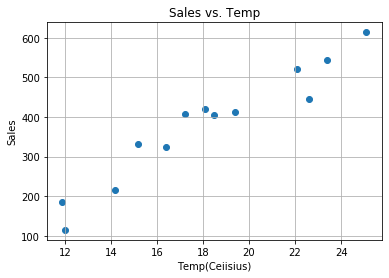

In [3]:
x1 = temp_sales.Temp
y1 = temp_sales.Sales
plt.scatter(x1, y1);
plt.grid(True)
plt.title("Sales vs. Temp");
plt.xlabel("Temp(Ceiisius)");
plt.ylabel("Sales");

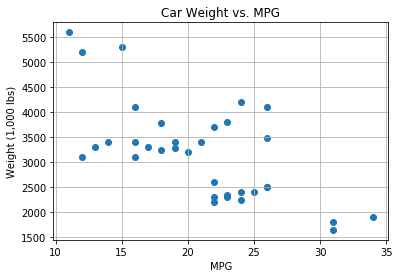

In [4]:
mpg_weight = df.iloc[:, 3:5]
mpg_weight.head()

x2 = mpg_weight.MPG
y2 = mpg_weight['Weight (1,000 lbs)']
plt.scatter(x2, y2);
plt.grid(True);
plt.title("Car Weight vs. MPG");
plt.xlabel("MPG");
plt.ylabel("Weight (1,000 lbs)");

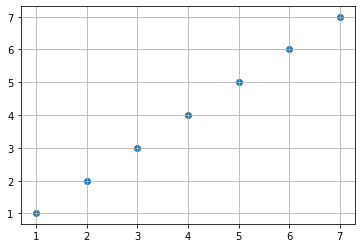

In [5]:
mpg_weight = df.iloc[:, 7:]
mpg_weight.head()

x3 = mpg_weight.x
y3 = mpg_weight.y
plt.scatter(x3, y3);
plt.grid(True);

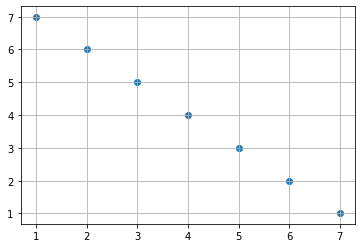

In [6]:
x4 = mpg_weight["x.1"]
y4 = mpg_weight["y.1"]
plt.scatter(x4, y4);
plt.grid(True);

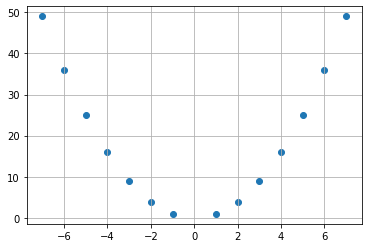

In [7]:
x5 = mpg_weight["x.2"]
y5 = mpg_weight["y.2"]
plt.scatter(x5, y5);
plt.grid(True);

1. Check Your Scatterplot Skills

Use the scatterplot between Temp and Sales to solve the matching quiz.

| **Term** | **Description** |
| --- | --- |
|Strength|Strong|
|Direction|Positive (Direct)|
|Correlation Coefficient|Close to 1|

2. Check Your Scatterplot Skills (Part II)

Use the scatterplot between car weight and miles per gallon to solve the matching quiz. Again, you can download the data

| **Term** | **Description** |
| --- | --- |
|Strength|Moderate|
|Direction|Negative (Direct)|
|Correlation Coefficient|-0.67|

3. Check Your Scatterplot Skills (Part III)

Use the scatterplots for the three datasets below to answer the following quiz. Again, you can download the data here.

| **Scatter plot** | **Correlation Coefficient (r) Value** |
| --- | --- |
|Plot 1|1|
|Plot 2|-1|
|Plot 3|0.0|


#### 08. Correlation Coefficients

**Correlation Coefficients**

Correlation coefficients provide a measure of the **strength** and **direction** of a **linear** relationship.

We can tell the direction based on whether the correlation is **positive** or **negative**.

A rule of thumb for judging the strength:

* **Strong**: $\small 0.7 \le |r| \le 1.0$
* **Moderate**: $\small 0.3 \le |r| \le 0.7$                    
* **Weak**: $\small 0.0 \le |r| \le 0.3$

**Calculation of the Correlation Coefficient**

$$r = \frac{\displaystyle\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{(\sum(x_i-\bar{x}))}\sqrt{(\sum(y_i-\bar{y}))}}$$

It can also be calculated in Excel and other spreadsheet applications using **CORREL(col1, col2)**, where col1 and col2 are the two columns you are looking to compare to one another.


#### 09. Correlation Coefficient Quizzes

1. Which of the below are true statements regarding the correlation coefficient?
    * [ ] The correlation coefficient can be any value.
    * [ ] A correlation coefficient of 0 means there is no relationship between two variables.
    * [ ] The correlation coefficient can be used to compare more than two variables to one another.
    * [x] The correlation coefficient must be between 1 and -1 (inclusively).
    * [ ] A smaller correlation coefficient means a weaker relationship between two variables.
    * [x] The correlation coefficient (specifically Pearson's correlation) is for measuring linear relationships.

2. A scatter plot and a correlation coefficient give the same information, so if we have this number, we don't really need a visual anymore.
    * [ ] True
    * [x] False

Use data associated with Temp and Sales to find the correlation coefficient. A link to the data is provided here, where you can use the **CORREL** function.

3. What is the value of the correlation coefficient?
    * [ ] -0.96 
    * [ ] 0.74 
    * [x] 0.96 
    * [ ] -0.74

4. The correlation coefficient suggests which of the below are true about the relationship between Temp and Sales. Choose all of the below that are true.
    * [x] The relationship between Temp and Sales is positive. 
    * [x] The relationship between Temp and Sales is strong. 
    * [x] The relationship between Temp and Sales is Linear
    * [ ] We cannot determine too much about the relationship with this value.


#### 10. Video: What Defines A Line?

A **line(直线)** is commonly identified by an **intercept(截距)** and a **slope(斜率)**.

The **intercept**($b_0(\text{统计量}), \beta_0(\text{参数})$) is defined as the predicted value of the response when the x-variable is zero.

The **slope**($b_1(\text{统计量}), \beta_1(\text{参数})$) is defined as the predicted change in the response for every one unit increase in the x-variable.

We notate the line in linear regression in the following way:
$$\hat y = b_0 + b_{1}x_{1}$$
where
$\hat y$ is the **predicted value of the response** from the line.
$b_0$ is the **intercept**.
$b_1$ is the **slope**.
$x_1$ is the **explanatory variable**.
$y$ is an **actual response value** for a data point in our dataset (not a prediction from our line).

#### 11. Quiz: What Defines A Line? - Notation Quiz

**Notation for Quizzes**

For the below quiz, let the following letters denote the corresponding notation:

$$y, \hat{y}, b_{0}, n, \beta_{0}, \beta_{1}, b_{1}$$

1. Match the letter for the above notation to the correct description for that notation.

| **Description** | **Notation Letter** |
| --- | --- |
|A predicted value of the response.|$\hat{y}$|
|An actual value of the response.|$y$|
|The predicted value of the response when the explanatory variable is zero.|$b_{0}$|
|The number of rows in the dataset.|$n$|

2. The same notation as before is provided for reference for this question. Match each letter for the corresponding notation to the corresponding description.

| **Description** | **Notation Letter** |
| --- | --- |
|The predicted change in the response for every one unit increase in the explanatory variable.|$b_1$|
|The actual average change in the response for the population with every one unit increase in the explanatory variable.|$\beta_{1}$|
|The actual average response value for the population when the explanatory variable is zero.|$\beta_{0}$|
|A predicted response value.||$\hat{y}$|


#### 12. Quiz: What Defines A Line? - Line Basics Quiz

**Quiz - Line Basics**

For many months, I keep track of the number of hours I work compared to a standard 40 hour week, where -20 represents 20 total hours of work for the week, and 60 is +60 on top of the standard for (or 100 hours for the week). The hours are represented on the x-axis. On the y-axis, is some measure of how happy my boss is with me for the same week. The higher this value, the happier my boss is with me.

Use this information and the plot to answer the following questions.

* Using the scenario described and the above plot, mark all of the below that are correct.
    * [x] If you work 40 hours per week, we expect your boss to be at a happiness level of 5.
    * [x] As you work more hours, we expect the happiness of your boss to increase. 
    * [ ] Working more causes your boss to become more happy.
    * [x] For each additional hour worked, we can predict an approximately 0.125 increase in the happiness of your boss.
    * [ ] For each additional hour worked, we can predict approximately a 5 unit increase in the happiness of your boss.


#### 13. Video: Fitting A Regression Line

The main algorithm used to find the best fit line is called the **least-squares algorithm(最小二乘法)**, which finds the line that minimizes $\displaystyle\sum_{i=1}^n(y_i - \bar{y_i})^2$

There are other ways we might choose a "best" line, but this algorithm tends to do a good job in many scenarios.

#### 14. Text: The Regression Closed Form Solution

How Do We Determine The Line of Best Fit?
You saw in the last video, that in regression we are interested in minimizing the following function:

$$\displaystyle\sum_{i=1}^n(y_i - \bar{y_i})^2$$

It turns out that in order to minimize this function, we have set equations that provide the intercept and slope that should be used.

In order to compute the slope and intercept, we need to compute the following:

$$\bar{x}=\frac{1}{n}\sum{x_i}$$
$$\bar{y}=\frac{1}{n}\sum{y_i}$$
$$s_x=\sqrt{\frac{1}{n-1} \sum(x_i-\bar{x})^2}$$
$$s_y=\sqrt{\frac{1}{n-1} \sum(y_i-\bar{y})^2}$$
$$r = \frac{\displaystyle\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{(\sum(x_i-\bar{x}))}\sqrt{(\sum(y_i-\bar{y}))}}$$
$$b_1 = r\frac{s_y}{s_x}$$
$$b_0 = \bar{y} - b_1\bar{x}$$

But Before You Get Carried Away…
Though you are now totally capable of carrying out these steps….

In the age of computers, it doesn't really make sense to do this all by hand. Instead, using computers can allow us to focus on interpreting and acting on the output. If you want to see a step by step of this in Excel, you can find that [here](https://www.youtube.com/watch?v=zPG4NjIkCjc). With the rest of this lesson, you will get some practice with this in Python.


#### 15. Screencast: Fitting A Regression Line in Python

In [8]:
import statsmodels.api as sms

df = pd.read_csv('house_price_area_only.csv')
df.head()

,Unnamed: 0,price,area
0,0,598291,1188
1,1,1744259,3512
2,2,571669,1134
3,3,493675,1940
4,4,1101539,2208


In [9]:
df['intercept'] = 1

lm = sms.OLS(df['price'], df[['intercept', 'area']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                 1.269e+04
Date:                Thu, 02 Apr 2020   Prob (F-statistic):               0.00
Time:                        21:48:58   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6026   BIC:                         1.691e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9587.8878   7637.479      1.255      0.209   -5384.303    2.46e+04
area         348.4664      3.093    112.662      0.000     342.403     354.530
==============================================================================
Omnibus:                      368.609   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              349.279
Skew:                           0.534   Prob(JB):                     1.43e-76
Kurtosis:                       2.499   Cond. No.                     4.93e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
results.params

intercept    9587.887783
area          348.466355
dtype: float64

* OLS stands for ordinary least squares

[Here](https://stats.stackexchange.com/questions/7948/when-is-it-ok-to-remove-the-intercept-in-a-linear-regression-model) is a post on the need of an intercept in nearly all cases of regression. Again, there are very few cases where you do not need to include an intercept in a linear model.


#### 16. Video: How to Interpret the Results?

We can **perform hypothesis tests** for the coefficients in our linear models using Python (and other software). These tests help us determine if there is a statistically significant linear relationship between a particular variable and the response. The hypothesis test for the intercept isn't useful in most cases.

However, the **hypothesis test for each x-variable** is a test of if that population slope is equal to zero vs. an alternative where the parameter differs from zero. Therefore, if the slope is different than zero (the alternative is true), we have evidence that the x-variable attached to that coefficient has a statistically significant linear relationship with the response. This in turn suggests that the x-variable should help us in predicting the response (or at least be better than not having it in the model).

In regression, 'P' values are always given for testing if the parameter for the intercept or the slope are equal to zero and the null hypothesis, like this. Then in the alternative, by default, Python and other software compute 'P' values using a not equal to. These 'P' values can give a quick glimpse as to whether or not a particular variable is useful for predicting the response. The 'P' value here on the intercept isn't as useful as this one here, which suggests that the area is statistically significant in relating to the price.


#### 17. Video: Does the Line Fit the Data Well?

The **Rsquared value(R平方)** is the square of the correlation coefficient.

A common definition for the Rsquared variable is that it is **the amount of variability in the response variable** that can be explained by the x-variable in our model. In general, the closer this value is to 1, the better our model fits the data.

Many feel that Rsquared isn't a great measure (which is possible true), but I would argue that using **cross-validation(交叉验证)** can assist us with validating with any measure that helps us understand the fit of a model to our data. Here, you can find one such result on why an individual doesn't care for Rsquared.


#### 18. Notebook + Quiz: How to Interpret the Results


In [11]:
df = pd.read_csv('house_price_area_only.csv')
df.head()

df['intercept'] = 1

lm = sms.OLS(df['price'], df[['intercept', 'area']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                 1.269e+04
Date:                Thu, 02 Apr 2020   Prob (F-statistic):               0.00
Time:                        21:48:58   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6026   BIC:                         1.691e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9587.8878   7637.479      1.255      0.209   -5384.303    2.46e+04
area         348.4664      3.093    112.662      0.000     342.403     354.530
==============================================================================
Omnibus:                      368.609   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              349.279
Skew:                           0.534   Prob(JB):                     1.43e-76
Kurtosis:                       2.499   Cond. No.                     4.93e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
results.params

intercept    9587.887783
area          348.466355
dtype: float64

1. Use your regression output from above to match each term with the most accurate description below.ANSWER CHOICES:
    * For every one unit increase in area, the predicted increase in price is (348.5). 
    * Based on our predicted values, it would be unexpected to have a price below (9588), because this is the predicted price of a house with no area.DescriptionValue

2. The p-value associated with area …
    * [x] is very small, which suggests there is statistical evidence that the population slope associated with area in relating to price is non-zero. 
    * [ ] is very small, which suggests there is statistical evidence that the population slope associated with area in relating to price is positive. 
    * [ ] is very small, which suggests there is statistical evidence that the population slope associated with area in relating to price is negative. 
    * [ ] is large, and therefore, we have no evidence of a relationship between area and price.


#### 19. Notebook + Quiz: Regression - Your Turn - Part I

In [13]:
### Regression Carats vs. Price

# In this notebook, you will perform a similar analysis to the one you did in 
# the previous notebook, but using a dataset holding the weight of a diamond 
# in carats, and the price of the corresponding diamond in dollars.

# To get started, let's read in the necessary libraries and the dataset.

import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('carats.csv', header= None)
df.columns = ['carats', 'price']
df.head()

,carats,price
0,0.17,355
1,0.16,328
2,0.17,350
3,0.18,325
4,0.25,642


In [14]:
# `1.` Similar to the last notebook, fit a simple linear regression model to 
# predict price based on the weight of a diamond.  Use your results to answer 
# the first question below.  Don't forget to add an intercept.

df['intercept'] = 1

lm = sms.OLS(df['price'], df[['intercept', 'carats']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     2070.
Date:                Thu, 02 Apr 2020   Prob (F-statistic):           6.75e-40
Time:                        21:48:58   Log-Likelihood:                -233.20
No. Observations:                  48   AIC:                             470.4
Df Residuals:                      46   BIC:                             474.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -259.6259     17.319    -14.991      0.000    -294.487    -224.765
carats      3721.0249     81.786     45.497      0.000    3556.398    3885.651
==============================================================================
Omnibus:                        0.739   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.691   Jarque-Bera (JB):                0.181
Skew:                           0.056   Prob(JB):                        0.913
Kurtosis:                       3.280   Cond. No.                         18.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

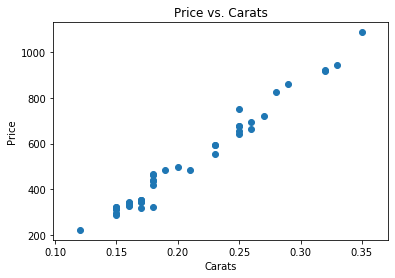

In [15]:
# `2.` Use [scatter](https://matplotlib.org/devdocs/gallery/lines_bars_and_markers/scatter_symbol.html#sphx-glr-gallery-lines-bars-and-markers-scatter-symbol-py) 
# to create a scatterplot of the relationship between price and weight.  
# Then use the scatterplot and the output from your regression model to answer 
# the second quiz question below.

plt.scatter(df['carats'], df['price']);
plt.xlabel('Carats');
plt.ylabel('Price');
plt.title('Price vs. Carats');

1. Use the results from your linear regression model to match each description to the value that best fits.
    * For every 0.01 carat increase in the carat size, we can expect the price to increase by (37.21) dollars. 
    * (97.8)% of the variability in price can be explained by the diamonds size. 
    * There are (48) diamonds in the dataset. 

2. Using the Rsquared and the relationship in the scatterplot, what is the value of the correlation coefficient?(0.99)

#### 20. Notebook + Quiz: Your Turn - Part II

In [16]:
from sklearn.datasets import load_boston

boston_data = load_boston()
df = pd.DataFrame()
df['MedianHomePrice'] = boston_data.target
df2 = pd.DataFrame(boston_data.data)
df['CrimePerCapita'] = df2.iloc[:,0];
df.head()

,MedianHomePrice,CrimePerCapita
0,24.0,0.00632
1,21.6,0.02731
2,34.7,0.02729
3,33.4,0.03237
4,36.2,0.06905


In [17]:
# The Boston housing data is a built in dataset in the sklearn library of python.  
# You will be using two of the variables from this dataset, 
# which are stored in **df**. The median home price in thousands of dollars 
# and the crime per capita in the area of the home are shown above.

# `1.` Use this dataframe to fit a linear model to predict the home price based 
# on the crime rate.  Use your output to answer the first quiz below. 
# Don't forget an intercept.

df['intercept'] = 1

lm = sms.OLS(df['MedianHomePrice'], df[['intercept', 'CrimePerCapita']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        MedianHomePrice   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Thu, 02 Apr 2020   Prob (F-statistic):           1.17e-19
Time:                        21:49:03   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         24.0331      0.409     58.740      0.000      23.229      24.837
CrimePerCapita    -0.4152      0.044     -9.460      0.000      -0.501      -0.329
==============================================================================
Omnibus:                      139.832   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.404
Skew:                           1.490   Prob(JB):                     7.14e-65
Kurtosis:                       5.264   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

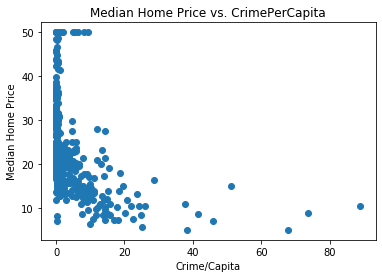

In [18]:
# `2.`Plot the relationship between the crime rate and median home price below.  
# Use your plot and the results from the first question as necessary to answer 
# the remaining quiz questions below.

plt.scatter(df['CrimePerCapita'], df['MedianHomePrice']);
plt.xlabel('Crime/Capita');
plt.ylabel('Median Home Price');
plt.title('Median Home Price vs. CrimePerCapita');

In [19]:
## To show the line that was fit I used the following code from 
## https://plot.ly/matplotlib/linear-fits/
## It isn't the greatest fit... but it isn't awful either


import plotly.plotly as py
import plotly.graph_objs as go

# MatPlotlib
import matplotlib.pyplot as plt
from matplotlib import pylab

# Scientific libraries
from numpy import arange,array,ones
from scipy import stats


xi = arange(0,100)
A = array([ xi, ones(100)])

# (Almost) linear sequence
y = df['MedianHomePrice']
x = df['CrimePerCapita']

# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*xi+intercept

plt.plot(x,y,'o', xi, line);
plt.xlabel('Crime/Capita');
plt.ylabel('Median Home Price');
pylab.title('Median Home Price vs. CrimePerCapita');

ModuleNotFoundError: No module named 'plotly'

1. Use the results of your linear regression model to match the following descriptions to the correct values.
    * For every 100% increase in crime per capita, the expected decrease in the median home price is (412.80) dollars.
    * If there was no crime, we would expect the median home price to be (24016) dollars.
    * (14.9)% of the variability in price can be explained by the crime per capita.
    * The p-value of (0.000) associated with crime per capita suggests that it is statistically significant in providing information in predicting the median home values.

2. Real data is a bit messier, but can you tell based on your results from the linear model and your scatterplot what the value of the correlation coefficient should be? Mark your answer below.
    * [ ] 0.386
    * [x] -0.386
    * [ ] 0.149
    * [ ] -0.149


#### 21. Video: Recap

In this lesson, you learned about the math and programming aspects of **fitting simple linear regression**. Additionally, you learned how to **interpret the coefficients of your regression model** and how to **assess if your explanatory variable is doing a good job** at allowing you to predict the response variable.

#### 22. Text: Recap + Next Steps

**Recap**

In this lesson, you learned about simple linear regression. The topics in this lesson included:

1. **Simple linear regression** is about building a line that models the relationship between **two quantitative variables**.
2. Learning about **correlation coefficients**. You learned that this is a measure that can inform you about the **strength** and **direction** of a linear relationship. 
3. The most common way to **visualize simple linear regression** is using a **scatterplot**. 
4. A line is defined by an **intercept** and **slope**, which you found using the statsmodels library in Python.
5. You learned the **interpretations** for the **slope**, **intercept**, and **Rsquared values**.

**Up Next**

In the next lesson, you will extend your knowledge from simple linear regression to multiple linear regression.


#### 23. Appendix: Glossary

* supervised machine learning(无监督式机器学习)
* unsupervised machine learning(无监督式机器学习)
* label(标记)
* Regression(回归, Multiple Liner(多重线性) and Logistic(对数几率))
* simple linear regression(简单线性回归)
* statsmodels.api.OLS(endog, exog=None, missing='none', hasconst=None, ** kwargs)
* response variable(dependent,应变量/因变量)
* explanatory variable(independent解释变量/自变量)
* Strength(强度,strong, moderate, weak)
* Direction(方向,positive, negative)
* line(直线)
* intercept(截距)
* slope(斜率)
* Rsquared value(R平方)

* * *

* least-squares algorithm(最小二乘法)
* cross-validation(交叉验证)

* * *

* scatter plots(散点图)
* correlation coefficient(相关系数)
* Pearson's correlation coefficient(皮尔逊积矩相关系数)